#Method - 1 **Using OpenCV** 

# Dataset
* Open License Plate Dataset
* public
* training has 245 images
* testing has 120 images

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
!pip install easyocr
!pip install imutils

     |████████████████████████████████| 63.6 MB 58 kB/s 
     |████████████████████████████████| 47.8 MB 1.6 MB/s 


In [ ]:
import imutils
import easyocr

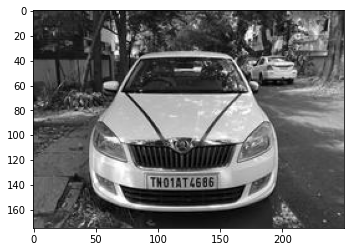

In [ ]:
img = cv2.imread('/content/18.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

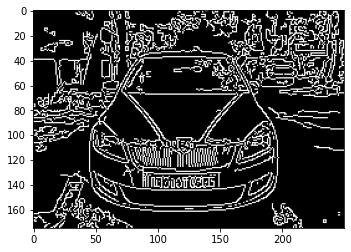

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 
edged = cv2.Canny(bfilter, 30, 200) 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = 0
for contour in contours:
    approx = cv2.approxPolyDP(contour,10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
print(location)

[[[ 81 110]]

 [[102 124]]

 [[ 98 107]]

 [[ 96 119]]]


In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

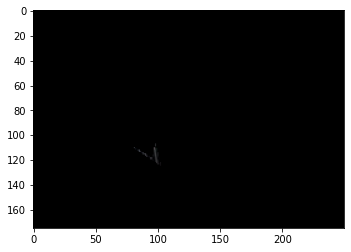

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

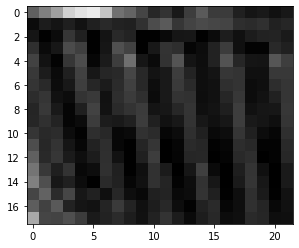

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
def preprocessing(img,k):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

  bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 
  edged = cv2.Canny(bfilter, 30, 200)
  
  #plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
  keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contours = imutils.grab_contours(keypoints)
  contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

  location = None
  for contour in contours:
      approx = cv2.approxPolyDP(contour, k, True)
      if len(approx) == 4:
          location = approx
          break
  mask = np.zeros(gray.shape, np.uint8)
 
  new_image = cv2.drawContours(mask, [location], 0,255, -1)
   

  new_image = cv2.bitwise_and(img, img, mask=mask)
  
  #plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
  (x,y) = np.where(mask==255)
  (x1, y1) = (np.min(x), np.min(y))
  (x2, y2) = (np.max(x), np.max(y))
  cropped_image = gray[x1:x2+5, y1:y2+5]
  return cropped_image
  #plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

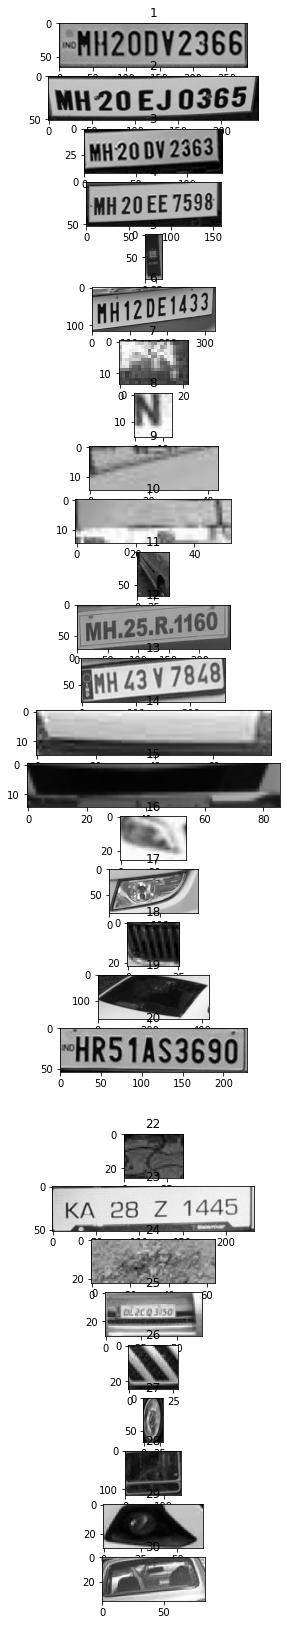

In [ ]:
# batch 1
x=1
y=31
fig = plt.figure(figsize=(30,30))
fig_list = []

for i in range(x,y):
    img = cv2.imread('/content/{}.jpg'.format(i))
    #print(i,sep=' ',end='')
    if i in [11,12,17,18,19,20,23,24,25,27,28,29,30]:
        p=preprocessing(img,10)
    elif i in [21]:
      continue
    else:
        p=preprocessing(img,5)
    fig_list.append(fig.add_subplot(y,x,i))
    fig_list[-1].set_title(i)
    plt.imshow(cv2.cvtColor(p, cv2.COLOR_BGR2RGB))

313233343536373839404142434445464748495051525354555657585960

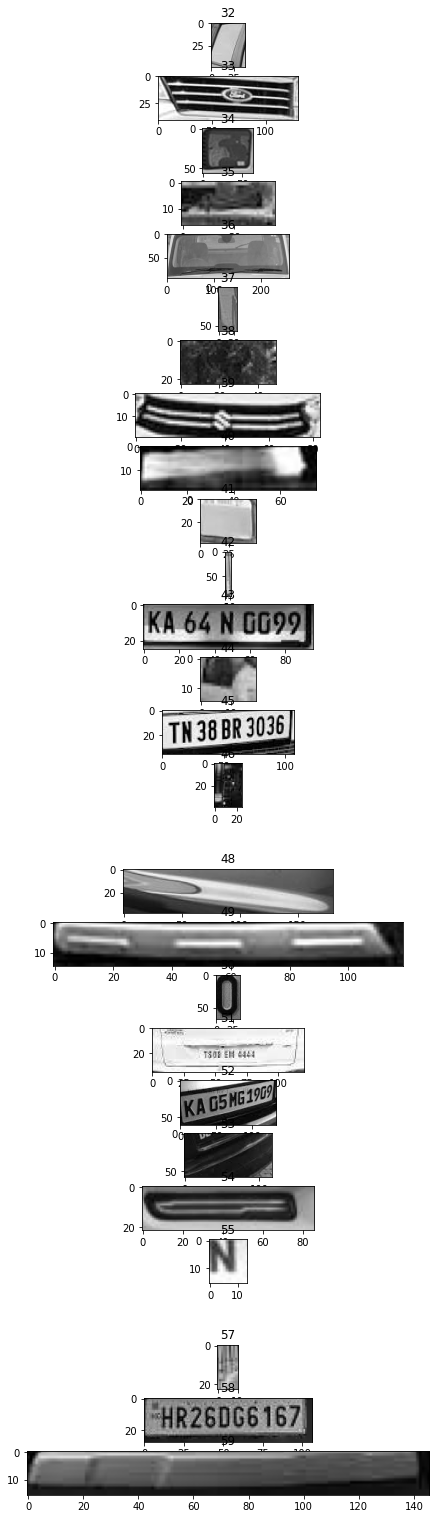

In [ ]:
# batch 2
x=31
y=61
fig = plt.figure(figsize=(30,30))
fig_list = []

for i in range(x,y):
    img = cv2.imread('/content/{}.jpg'.format(i))
    print(i,sep=',',end='')
    if i in [11,12,17,18,19,20,23,24,25,27,28,29,30,36,38,39,46,48,50]:
        p=preprocessing(img,10)
    elif i in [21,31,47,56,60]:
      continue
    else:
        p=preprocessing(img,5)
    fig_list.append(fig.add_subplot(y-30,x-30,i-30))
    fig_list[-1].set_title(i)
    plt.imshow(cv2.cvtColor(p, cv2.COLOR_BGR2RGB))

61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,

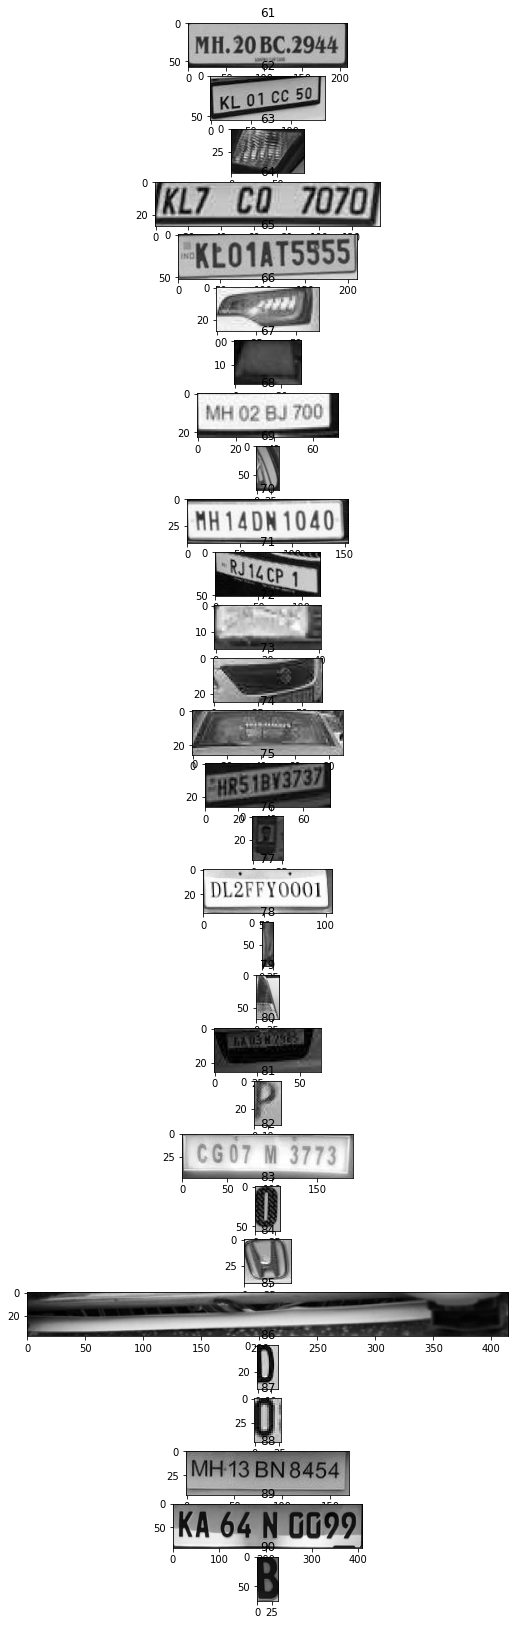

In [ ]:
# batch 3
x=61
y=91
fig = plt.figure(figsize=(30,30))
fig_list = []

for i in range(x,y):
    img = cv2.imread('/content/{}.jpg'.format(i))
    print(i,sep=',',end=',')
    if i in [79,80,83,85,87,90]:
        p=preprocessing(img,10)
    elif i in [21]:
      continue
    else:
        p=preprocessing(img,5)
    fig_list.append(fig.add_subplot(y-60,x-60,i-60))
    fig_list[-1].set_title(i)
    plt.imshow(cv2.cvtColor(p, cv2.COLOR_BGR2RGB))

91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,

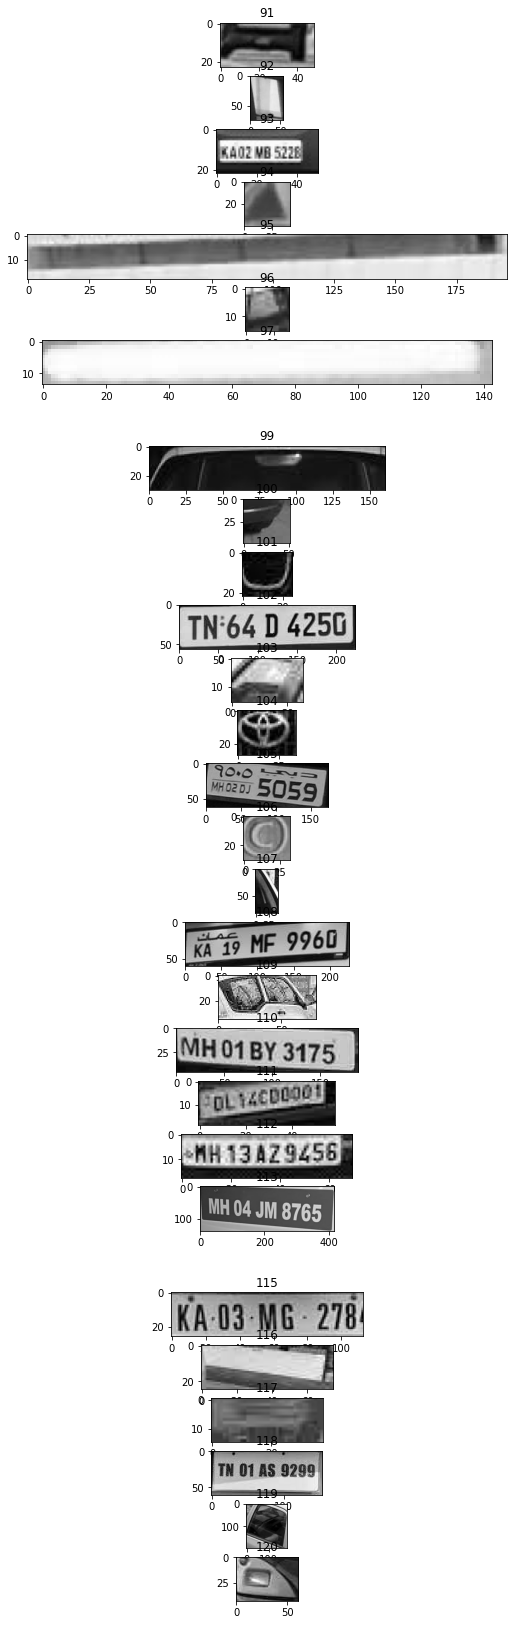

In [ ]:
# batch 4
x=91
y=121
fig = plt.figure(figsize=(30,30))
fig_list = []

for i in range(x,y):
    img = cv2.imread('/content/{}.jpg'.format(i))
    print(i,sep=',',end=',')
    if i in [93,101,109,110,115,119]:
        p=preprocessing(img,10)
    elif i in [98,114]:
      continue
    else:
        p=preprocessing(img,5)
    fig_list.append(fig.add_subplot(y-90,x-90,i-90))
    fig_list[-1].set_title(i)
    plt.imshow(cv2.cvtColor(p, cv2.COLOR_BGR2RGB))

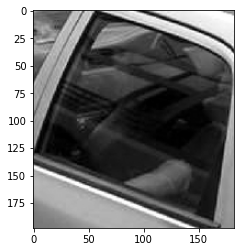

In [ ]:
img = cv2.imread('/content/119.jpg')
preprocessing1(img,10)

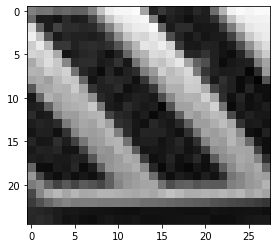

In [ ]:
def preprocessing1(img,k):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

  bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #smoothining purpose
  edged = cv2.Canny(bfilter, 30, 200) # for edge detection
  
  #plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
  keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contours = imutils.grab_contours(keypoints)
  contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

  location = None
  for contour in contours:
      approx = cv2.approxPolyDP(contour, k, True)
      if len(approx) == 4:
          location = approx
          break
  mask = np.zeros(gray.shape, np.uint8)
 
  new_image = cv2.drawContours(mask, [location], 0,255, -1)
   

  new_image = cv2.bitwise_and(img, img, mask=mask)
  
  #plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
  (x,y) = np.where(mask==255)
  (x1, y1) = (np.min(x), np.min(y))
  (x2, y2) = (np.max(x), np.max(y))
  cropped_image = gray[x1:x2+5, y1:y2+5]
  
  plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
